In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly18.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly12.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly5.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly16.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly6.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly20.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly15.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly10.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly14.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly9.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly2.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly11.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly17.jpg
/kaggle/input/bear-classification-dataset/bears/grizzly/grizzly19.jpg
/kaggle/input/bear-class

In [3]:

#hide
#! [ -e /content ] && pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()

In [4]:

#hide
#from fastbook import *
#from fastai.vision.widgets import *

In [7]:
!pip install -U fastai
!pip install fastbook
!pip install "numpy<2" "fastai" --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
from fastai.vision.all import *
import warnings
warnings.filterwarnings('ignore')

In [9]:

path = Path('/kaggle/input/bear-classification-dataset/bears')

In [10]:
print("Dataset structure:")
for folder in path.ls():
    if folder.is_dir():
        files = get_image_files(folder)
        print(f"📁 {folder.name}: {len(files)} images")


Dataset structure:
📁 grizzly: 20 images
📁 black: 20 images
📁 teddy: 20 images


In [11]:
dls = ImageDataLoaders.from_folder(
    path, 
    train='.', 
    valid_pct=0.2,  # 20% for validation
    seed=42,        # For reproducible splits
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)

print(f"Training images: {len(dls.train_ds)}")
print(f"Validation images: {len(dls.valid_ds)}")

Training images: 48
Validation images: 12


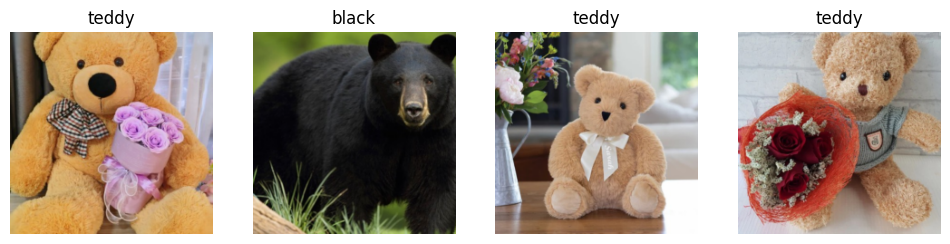

In [12]:

dls.valid.show_batch(max_n=4, nrows=1)

In [15]:

from fastai.vision.all import *

path = Path('/kaggle/input/bear-classification-dataset/bears')

dls = ImageDataLoaders.from_folder(
    path, 
    train='.', 
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    bs=8
)

# Don't specify path - let fastai use default (which should be /kaggle/working)
learn = vision_learner(dls, resnet34, metrics=error_rate)

print("Training with automatic path handling...")
#learn.fit(4, lr=1e-5)
learn.fine_tune(4)

# Verify where model was saved
print(f"Model path: {learn.path}")

Training with automatic path handling...


epoch,train_loss,valid_loss,error_rate,time
0,1.647685,0.246730,0.083333,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.262090,0.098793,0.000000,00:25
1,0.177793,0.061312,0.000000,00:25
2,0.183719,0.029751,0.000000,00:25
3,0.176024,0.031278,0.000000,00:24


Model path: /kaggle/input/bear-classification-dataset/bears


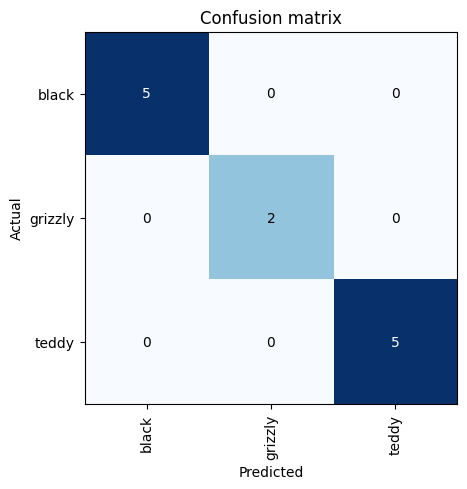

In [16]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

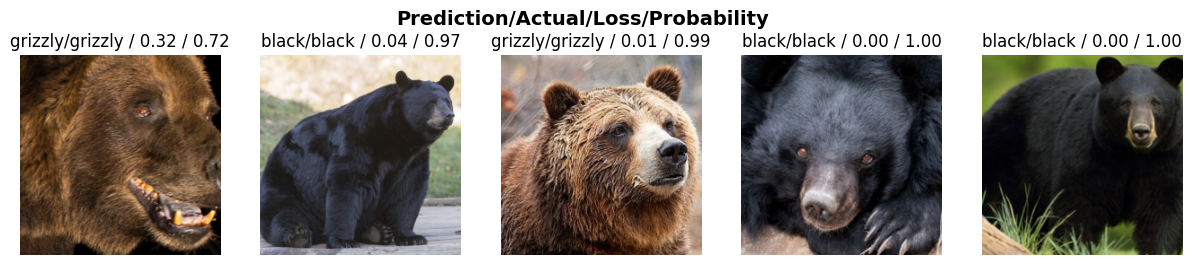

In [17]:
interp.plot_top_losses(5, nrows=1)

In [21]:

#learn.export() not working because the path is in kaggle/input, which is read only file
     
learn.export('/kaggle/working/export.pkl')


In [20]:

path = Path()
path.ls(file_exts='.pkl')
     

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [27]:
learn_inf.predict('/kaggle/input/test-set/Test/Teddy Bear.jpg')

('teddy', tensor(2), tensor([0.1317, 0.1613, 0.7069]))

In [28]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [30]:
import ipywidgets as widgets
from IPython.display import display
from fastai.vision.all import *

In [31]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

In [32]:
btn_upload = SimpleNamespace(data = ['/kaggle/input/test-set/Test/Teddy Bear.jpg'])

In [33]:
img = PILImage.create(btn_upload.data[-1])

In [34]:

#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl
     

Output()

In [35]:
pred,pred_idx,probs = learn_inf.predict(img)

In [36]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 0.7069')

In [37]:
btn_run = widgets.Button(description='Classify')
btn_run
#make classify button

Button(description='Classify', style=ButtonStyle())

In [38]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [39]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()
    

In [42]:
#hide_output
from ipywidgets import VBox, FileUpload, Button, Label, Output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [44]:

#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.6 MB/s eta 0:00:0000:0100:01
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.11 OK
